# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [113]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

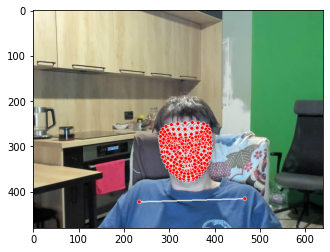

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [24]:
result_test.shape

(1662,)

In [23]:
468*3+33*4+21*3+21*3

1662

In [25]:
np.save('0', result_test)

In [27]:
d = np.load('0.npy')
d.shape

(1662,)

# 4. Setup Folders for Collection

In [114]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_hello_first_channal') 

# Actions that we try to detect
actions = np.array(['Привет', 'first', 'channal'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [29]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [75]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [76]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [77]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [78]:
label_map = {label:num for num, label in enumerate(actions)}

In [79]:
label_map

{'hello': 0, 'first': 1, 'channal': 2}

In [80]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [81]:
np.array(sequences).shape

(90, 30, 1662)

In [82]:
np.array(labels).shape

(90,)

In [83]:
X = np.array(sequences)

In [84]:
X.shape

(90, 30, 1662)

In [85]:
y = to_categorical(labels).astype(int)

In [86]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [88]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [90]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [91]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [92]:
res = [.7, 0.9, 0.8]
actions[np.argmax(res)]

'first'

In [93]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [94]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 368ms/step - loss: 1.3362 - categorical_accuracy: 0.4227
Epoch 2/2000
3/3 [==============================] - 0s 37ms/step - loss: 10.3115 - categorical_accuracy: 0.3561
Epoch 3/2000
3/3 [==============================] - 0s 37ms/step - loss: 10.2261 - categorical_accuracy: 0.2643
Epoch 4/2000
3/3 [==============================] - 0s 34ms/step - loss: 14.8566 - categorical_accuracy: 0.4227
Epoch 5/2000
3/3 [==============================] - 0s 35ms/step - loss: 46.3443 - categorical_accuracy: 0.3268
Epoch 6/2000
3/3 [==============================] - 0s 37ms/step - loss: 39.2715 - categorical_accuracy: 0.4089
Epoch 7/2000
3/3 [==============================] - 0s 37ms/step - loss: 75.2871 - categorical_accuracy: 0.2975
Epoch 8/2000
3/3 [==============================] - 0s 37ms/step - loss: 54.6070 - categorical_accuracy: 0.3112
Epoch 9/2000
3/3 [==============================] - 0s 37ms/step - loss: 72.0632 - categorical_accuracy:

Epoch 74/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.6056 - categorical_accuracy: 0.3875
Epoch 75/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.2102 - categorical_accuracy: 0.2877
Epoch 76/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.9296 - categorical_accuracy: 0.3738
Epoch 77/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.8991 - categorical_accuracy: 0.3249
Epoch 78/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.0670 - categorical_accuracy: 0.3131
Epoch 79/2000
3/3 [==============================] - 0s 38ms/step - loss: 5.0537 - categorical_accuracy: 0.3913
Epoch 80/2000
3/3 [==============================] - 0s 35ms/step - loss: 3.3013 - categorical_accuracy: 0.3014
Epoch 81/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.9238 - categorical_accuracy: 0.2916
Epoch 82/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.6826 - categorical_accuracy:

3/3 [==============================] - 0s 35ms/step - loss: 0.7200 - categorical_accuracy: 0.6086
Epoch 219/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.7100 - categorical_accuracy: 0.6693
Epoch 220/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.7110 - categorical_accuracy: 0.6085
Epoch 221/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.6850 - categorical_accuracy: 0.6614
Epoch 222/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.7862 - categorical_accuracy: 0.6320
Epoch 223/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.6792 - categorical_accuracy: 0.7397
Epoch 224/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.6824 - categorical_accuracy: 0.7026
Epoch 225/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.8192 - categorical_accuracy: 0.5030
Epoch 226/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.7604 - categorical_accuracy: 0.663

3/3 [==============================] - 0s 35ms/step - loss: 0.6431 - categorical_accuracy: 0.6223
Epoch 363/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.6005 - categorical_accuracy: 0.8042
Epoch 364/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.5725 - categorical_accuracy: 0.7319
Epoch 365/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.6031 - categorical_accuracy: 0.7379
Epoch 366/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4966 - categorical_accuracy: 0.8004
Epoch 367/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4550 - categorical_accuracy: 0.8962
Epoch 368/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.4906 - categorical_accuracy: 0.8747
Epoch 369/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.6099 - categorical_accuracy: 0.6693
Epoch 370/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.5069 - categorical_accuracy: 0.827

3/3 [==============================] - 0s 35ms/step - loss: 1.3724 - categorical_accuracy: 0.4305
Epoch 507/2000
3/3 [==============================] - 0s 35ms/step - loss: 2.3714 - categorical_accuracy: 0.3347
Epoch 508/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.6497 - categorical_accuracy: 0.2779
Epoch 509/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.3163 - categorical_accuracy: 0.2486
Epoch 510/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.1348 - categorical_accuracy: 0.3797
Epoch 511/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.1547 - categorical_accuracy: 0.4227
Epoch 512/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.1554 - categorical_accuracy: 0.3366
Epoch 513/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0676 - categorical_accuracy: 0.3797
Epoch 514/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.0634 - categorical_accuracy: 0.428

3/3 [==============================] - 0s 36ms/step - loss: 0.7825 - categorical_accuracy: 0.6477
Epoch 651/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.5865 - categorical_accuracy: 0.6987
Epoch 652/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.8186 - categorical_accuracy: 0.5539
Epoch 653/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.6001 - categorical_accuracy: 0.7280
Epoch 654/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.5868 - categorical_accuracy: 0.7847
Epoch 655/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.5905 - categorical_accuracy: 0.7554
Epoch 656/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.5357 - categorical_accuracy: 0.8278
Epoch 657/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.5369 - categorical_accuracy: 0.7828
Epoch 658/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.5678 - categorical_accuracy: 0.790

3/3 [==============================] - 0s 37ms/step - loss: 0.3945 - categorical_accuracy: 0.8786
Epoch 795/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.4313 - categorical_accuracy: 0.8610
Epoch 796/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.4226 - categorical_accuracy: 0.8356
Epoch 797/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4203 - categorical_accuracy: 0.8278
Epoch 798/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3277 - categorical_accuracy: 0.8571
Epoch 799/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3660 - categorical_accuracy: 0.8884
Epoch 800/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3693 - categorical_accuracy: 0.8336
Epoch 801/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3696 - categorical_accuracy: 0.8649
Epoch 802/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3617 - categorical_accuracy: 0.868

3/3 [==============================] - 0s 37ms/step - loss: 0.2451 - categorical_accuracy: 0.8845
Epoch 939/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.3173 - categorical_accuracy: 0.8767
Epoch 940/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3016 - categorical_accuracy: 0.8591
Epoch 941/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3355 - categorical_accuracy: 0.8552
Epoch 942/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2928 - categorical_accuracy: 0.8748
Epoch 943/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2634 - categorical_accuracy: 0.8650
Epoch 944/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3170 - categorical_accuracy: 0.8846
Epoch 945/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4095 - categorical_accuracy: 0.8610
Epoch 946/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.6105 - categorical_accuracy: 0.683

3/3 [==============================] - 0s 36ms/step - loss: 0.3162 - categorical_accuracy: 0.8572
Epoch 1083/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2476 - categorical_accuracy: 0.9001
Epoch 1084/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2661 - categorical_accuracy: 0.8904
Epoch 1085/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3112 - categorical_accuracy: 0.8807
Epoch 1086/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2093 - categorical_accuracy: 0.9491
Epoch 1087/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3052 - categorical_accuracy: 0.8924
Epoch 1088/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2903 - categorical_accuracy: 0.8709
Epoch 1089/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2602 - categorical_accuracy: 0.9100
Epoch 1090/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.2488 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.2118 - categorical_accuracy: 0.9335
Epoch 1155/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2793 - categorical_accuracy: 0.9022
Epoch 1156/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2476 - categorical_accuracy: 0.9276
Epoch 1157/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2367 - categorical_accuracy: 0.9060
Epoch 1158/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2737 - categorical_accuracy: 0.9178
Epoch 1159/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2121 - categorical_accuracy: 0.9198
Epoch 1160/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2076 - categorical_accuracy: 0.9041
Epoch 1161/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2423 - categorical_accuracy: 0.9100
Epoch 1162/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2270 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.2696 - categorical_accuracy: 0.8982
Epoch 1227/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2612 - categorical_accuracy: 0.9159
Epoch 1228/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2360 - categorical_accuracy: 0.9119
Epoch 1229/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1842 - categorical_accuracy: 0.9511
Epoch 1230/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1961 - categorical_accuracy: 0.9569
Epoch 1231/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2083 - categorical_accuracy: 0.9354
Epoch 1232/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2151 - categorical_accuracy: 0.9472
Epoch 1233/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1941 - categorical_accuracy: 0.9237
Epoch 1234/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.2241 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.2337 - categorical_accuracy: 0.9335
Epoch 1299/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.2794 - categorical_accuracy: 0.8807
Epoch 1300/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2981 - categorical_accuracy: 0.8278
Epoch 1301/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3813 - categorical_accuracy: 0.8474
Epoch 1302/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2945 - categorical_accuracy: 0.8806
Epoch 1303/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.3191 - categorical_accuracy: 0.8748
Epoch 1304/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4171 - categorical_accuracy: 0.8083
Epoch 1305/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3927 - categorical_accuracy: 0.8239
Epoch 1306/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2035 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.2145 - categorical_accuracy: 0.8983
Epoch 1371/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.1417 - categorical_accuracy: 0.9471
Epoch 1372/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.1614 - categorical_accuracy: 0.9511
Epoch 1373/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1664 - categorical_accuracy: 0.9139
Epoch 1374/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1369 - categorical_accuracy: 0.9569
Epoch 1375/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1597 - categorical_accuracy: 0.9374
Epoch 1376/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1656 - categorical_accuracy: 0.9100
Epoch 1377/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1911 - categorical_accuracy: 0.9237
Epoch 1378/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.1539 - categorical_accurac

3/3 [==============================] - 0s 38ms/step - loss: 0.1902 - categorical_accuracy: 0.9295
Epoch 1443/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2682 - categorical_accuracy: 0.9158
Epoch 1444/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2435 - categorical_accuracy: 0.8494
Epoch 1445/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.2149 - categorical_accuracy: 0.9413
Epoch 1446/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1871 - categorical_accuracy: 0.9452
Epoch 1447/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2614 - categorical_accuracy: 0.8591
Epoch 1448/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1945 - categorical_accuracy: 0.9412
Epoch 1449/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2364 - categorical_accuracy: 0.9021
Epoch 1450/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2656 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.2995 - categorical_accuracy: 0.8885
Epoch 1515/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2475 - categorical_accuracy: 0.9080
Epoch 1516/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1883 - categorical_accuracy: 0.9315
Epoch 1517/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2319 - categorical_accuracy: 0.9040
Epoch 1518/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.3671 - categorical_accuracy: 0.8473
Epoch 1519/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.4174 - categorical_accuracy: 0.8297
Epoch 1520/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2699 - categorical_accuracy: 0.9334
Epoch 1521/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2671 - categorical_accuracy: 0.8688
Epoch 1522/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2220 - categorical_accurac

Epoch 1657/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3440 - categorical_accuracy: 0.8689
Epoch 1658/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2146 - categorical_accuracy: 0.9335
Epoch 1659/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2380 - categorical_accuracy: 0.9295
Epoch 1660/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2019 - categorical_accuracy: 0.9452
Epoch 1661/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1689 - categorical_accuracy: 0.9452
Epoch 1662/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2584 - categorical_accuracy: 0.9119
Epoch 1663/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1513 - categorical_accuracy: 0.9550
Epoch 1664/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2472 - categorical_accuracy: 0.9080
Epoch 1665/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1717 - cat

3/3 [==============================] - 0s 37ms/step - loss: 0.2709 - categorical_accuracy: 0.8591
Epoch 1801/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.2146 - categorical_accuracy: 0.8904
Epoch 1802/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.2326 - categorical_accuracy: 0.8650
Epoch 1803/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1422 - categorical_accuracy: 0.9472
Epoch 1804/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1481 - categorical_accuracy: 0.9100
Epoch 1805/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1137 - categorical_accuracy: 0.9432
Epoch 1806/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1431 - categorical_accuracy: 0.9276
Epoch 1807/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1497 - categorical_accuracy: 0.9139
Epoch 1808/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1098 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.1031 - categorical_accuracy: 0.9530
Epoch 1873/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1062 - categorical_accuracy: 0.9608
Epoch 1874/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1239 - categorical_accuracy: 0.9530
Epoch 1875/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1566 - categorical_accuracy: 0.9315
Epoch 1876/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.1251 - categorical_accuracy: 0.9276
Epoch 1877/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1647 - categorical_accuracy: 0.9511
Epoch 1878/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1681 - categorical_accuracy: 0.9276
Epoch 1879/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1555 - categorical_accuracy: 0.9276
Epoch 1880/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0928 - categorical_accurac

3/3 [==============================] - 0s 37ms/step - loss: 0.0826 - categorical_accuracy: 0.9628
Epoch 1945/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0599 - categorical_accuracy: 0.9765
Epoch 1946/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0823 - categorical_accuracy: 0.9726
Epoch 1947/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0710 - categorical_accuracy: 0.9648
Epoch 1948/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1566 - categorical_accuracy: 0.9335
Epoch 1949/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.2138 - categorical_accuracy: 0.9119
Epoch 1950/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.2549 - categorical_accuracy: 0.8924
Epoch 1951/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.2187 - categorical_accuracy: 0.8787
Epoch 1952/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.2535 - categorical_accurac

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [96]:
res = model.predict(X_test)

In [99]:
actions[np.argmax(res[0])]

'first'

In [100]:
actions[np.argmax(y_test[0])]

'first'

# 9. Save Weights

In [101]:
model.save('action_hello_first_channal.h5')

In [217]:
del model

In [102]:
model.save('action_hello_first_channal.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [103]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [104]:
yhat = model.predict(X_test)

In [105]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [107]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 1],
        [1, 1]],

       [[2, 1],
        [1, 1]]], dtype=int64)

In [108]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [109]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [110]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [67]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [68]:
len(sequence)

TypeError: object of type 'int' has no len()

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.S

Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution

Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution

Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Привет
<class 'mediapipe.python.solution

In [20]:
cap.release()
cv2.destroyAllWindows()

In [71]:
res[np.argmax(res)] > threshold

False

In [72]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [73]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.25672954, 0.28549445, 0.45777595]], dtype=float32)